In [94]:
from datetime import datetime

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('user_data_raw/dataport-export.csv')

In [3]:
df.head()

,localminute,dataid,use,gen,grid
0,2014-01-01 00:00:00-06,26,1.817583,0.000000,1.817583
1,2014-01-01 00:00:00-06,5545,0.201817,-0.008000,0.201817
2,2014-01-01 00:00:00-06,93,1.748767,-0.005000,1.748767
3,2014-01-01 00:00:00-06,5357,1.242767,-0.020000,1.242767
4,2014-01-01 00:00:00-06,114,0.252083,-0.006983,0.252083


In [10]:
datetimes = [datetime.strptime(x, '%Y-%m-%d %H:00:00-%M') for x in df['localminute']]

In [62]:
df['year'] = [x.year for x in datetimes]
df['month'] = [x.month for x in datetimes]
df['day'] = [x.day for x in datetimes]
df['hour'] = [x.hour for x in datetimes]
df['weekday'] = [x.weekday() for x in datetimes]

In [30]:
def get_start_and_end_index(df, st_dt, end_dt):

    start_index = df[(df['year'] == st_dt.year)
                     & (df['month'] == st_dt.month)
                     & (df['day'] == st_dt.day)].index[0]
    
    end_index = df[(df['year'] == end_dt.year)
                     & (df['month'] == end_dt.month)
                     & (df['day'] == end_dt.day)].index[-1]
    
    return (start_index, end_index)

In [63]:
spring_start, spring_end = get_start_and_end_index(df, datetime(2014,3,20), datetime(2014,6,19))
summer_start, summer_end = get_start_and_end_index(df, datetime(2014,6,20), datetime(2014,9,21))
fall_start, fall_end = get_start_and_end_index(df, datetime(2014,9,22), datetime(2014,12,20))
winter_start, winter_end = get_start_and_end_index(df, datetime(2014,12,21), datetime(2015,3,19))

In [64]:
df_spring = df.iloc[spring_start:spring_end,:]
df_summer = df.iloc[summer_start:summer_end,:]
df_fall   = df.iloc[fall_start:fall_end,:]
df_winter = df.iloc[winter_start:winter_end,:]

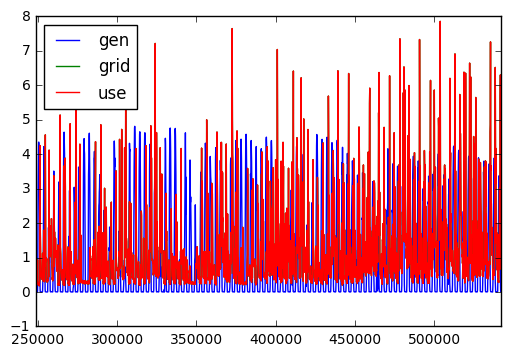

In [65]:
df_spring[df_spring['dataid'] == 26][['gen', 'grid', 'use']].plot()

In [67]:
df_spring.head()

,localminute,dataid,use,gen,grid,year,month,day,weekday,hour
248795,2014-03-20 00:00:00-05,2449,0.767550,-0.004317,0.767550,2014,3,20,3,0
248796,2014-03-20 00:00:00-05,6941,0.429667,-0.011000,0.429667,2014,3,20,3,0
248797,2014-03-20 00:00:00-05,1192,0.485283,-0.003117,0.485283,2014,3,20,3,0
248798,2014-03-20 00:00:00-05,7731,0.204000,-0.015000,0.204000,2014,3,20,3,0
248799,2014-03-20 00:00:00-05,4336,4.359567,-0.010067,4.359567,2014,3,20,3,0


(0, 4.5)

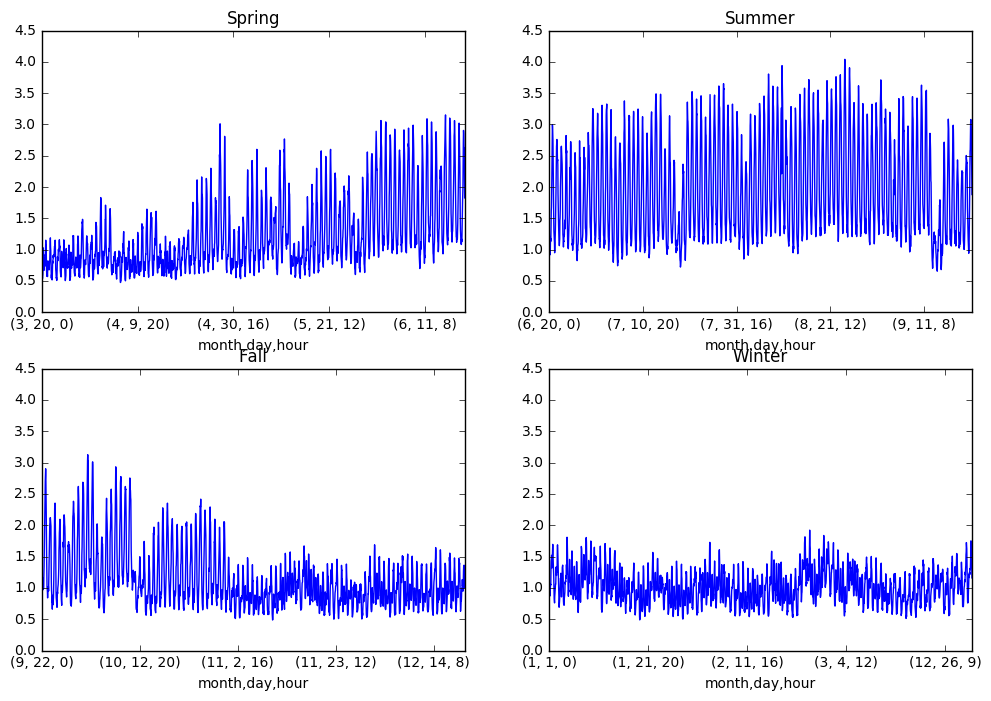

In [114]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))

grouping = ['month', 'day', 'hour']
attr = 'use'

df_spring.groupby(grouping)[attr].mean().plot(ax=ax1)
ax1.set_title('Spring')
ax1.set_ylim(0,4.5)
df_summer.groupby(grouping)[attr].mean().plot(ax=ax2)
ax2.set_title('Summer')
ax2.set_ylim(0,4.5)
df_fall.groupby(grouping)[attr].mean().plot(ax=ax3)
ax3.set_title('Fall')
ax3.set_ylim(0,4.5)
df_winter.groupby(grouping)[attr].mean().plot(ax=ax4)
ax4.set_title('Winter')
ax4.set_ylim(0,4.5)

# Global average

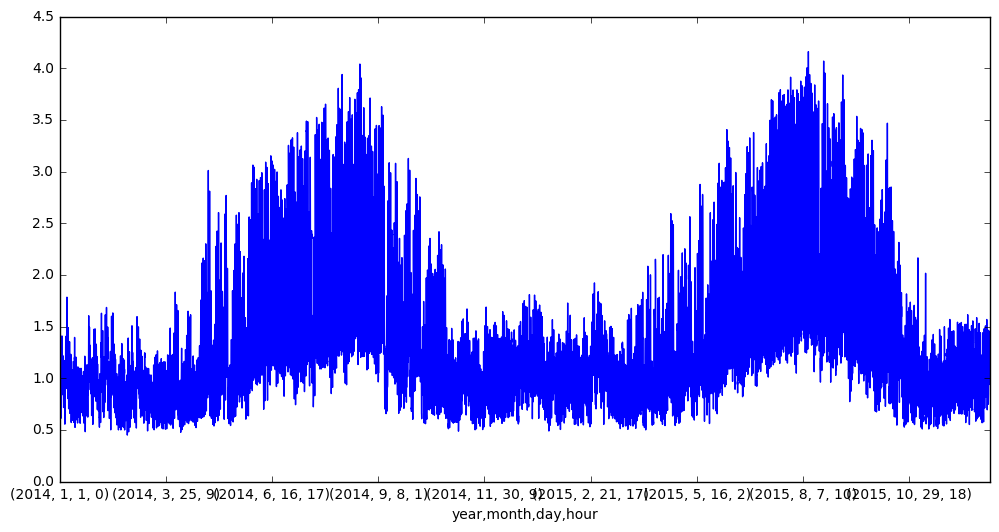

In [115]:
df.groupby(['year', 'month', 'day', 'hour'])['use'].mean().plot(figsize=(12,6))

In [117]:
df.groupby(['year', 'month', 'day', 'hour'])['use'].mean().to_csv('average_all_users.csv')

# Average by city

## Dallas

In [118]:
meta = pd.read_csv('dataport-metadata.csv')

In [128]:
dallas_id = meta[meta['city'] == 'Dallas'].dataid.as_matrix()

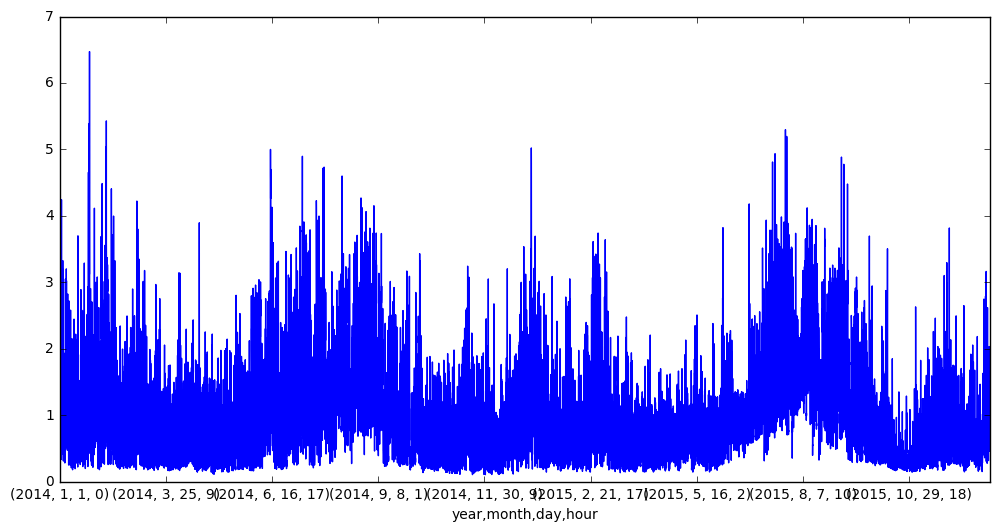

In [141]:
dallas_df = df[df['dataid'].isin(dallas_id)]
mean = dallas_df.groupby(['year', 'month', 'day', 'hour'])['use'].mean()
mean.plot(figsize=(12,6))

In [142]:
mean.to_csv('aggregations/average_dallas_users.csv')

## Austin

In [146]:
austin_id = meta[meta['city'] == 'Austin'].dataid.as_matrix()

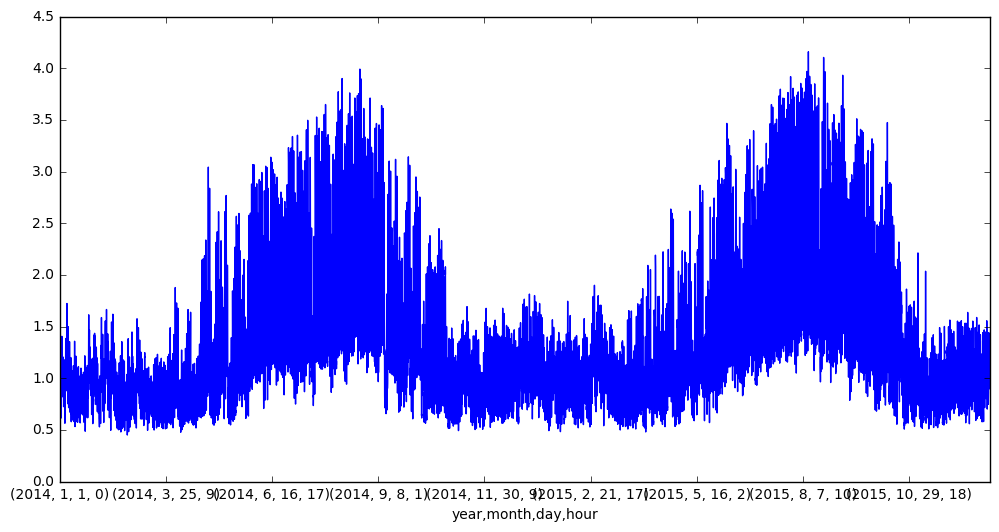

In [148]:
austin_df = df[df['dataid'].isin(austin_id)]
mean = austin_df.groupby(['year', 'month', 'day', 'hour'])['use'].mean()
mean.plot(figsize=(12,6))

In [149]:
mean.to_csv('aggregations/average_austin_users.csv')


# Season average by day for user

In [218]:
import os

def export_seasonal_averages_for_users(source_df, season):
    grouped = source_df.groupby(['dataid', 'weekday', 'hour'])['use'].mean()
    flatten = pd.DataFrame(grouped).reset_index()
    dataids = flatten.dataid.unique()
    
    try:
        os.stat('aggregations/' + season)
    except:
        os.mkdir('aggregations/' + season)
    
    for dataid in dataids:
        flatten[flatten['dataid'] == dataid].to_csv('aggregations/' + season + '/average_weekday_' + str(dataid) + '.csv')

## Spring

In [220]:
export_seasonal_averages_for_users(df_spring, 'spring')

In [223]:
export_seasonal_averages_for_users(df_summer, 'summer')

In [222]:
export_seasonal_averages_for_users(df_fall, 'fall')

In [224]:
export_seasonal_averages_for_users(df_winter, 'winter')